In [1]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

cp: cannot stat 'kaggle.json': No such file or directory


In [2]:
!kaggle datasets download -d salader/dogs-vs-cats

Dataset URL: https://www.kaggle.com/datasets/salader/dogs-vs-cats
License(s): unknown
 99% 1.05G/1.06G [00:08<00:00, 118MB/s]
100% 1.06G/1.06G [00:08<00:00, 136MB/s]


In [3]:
import zipfile
zip_ref = zipfile.ZipFile('/content/dogs-vs-cats.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [14]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, BatchNormalization, Dropout

In [5]:
train_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/train',
    labels = 'inferred',
    label_mode = 'int',
    batch_size = 32,
    image_size = (256, 256)
)

test_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/test',
    labels = 'inferred',
    label_mode = 'int',
    batch_size = 32,
    image_size = (256, 256)
)

Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


In [6]:
# Normalize
def process(image, label):
    image = tf.cast(image/255. , tf.float32)
    return image, label

train_ds = train_ds.map(process)
test_ds = test_ds.map(process)

In [15]:
# Create CNN model with 3 convolutional lyrs, 1st lyr 32, 2nd lyr 64 & 3rd lyr 128 filters

model = Sequential()

model.add(Conv2D(32, kernel_size = (3, 3), padding = 'valid', activation = 'relu', input_shape = (256, 256, 3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size = (2, 2), strides = 2, padding = 'valid'))

model.add(Conv2D(64, kernel_size = (3, 3), padding = 'valid', activation = 'relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size = (2, 2), strides = 2, padding = 'valid'))

model.add(Conv2D(128, kernel_size = (3, 3), padding = 'valid', activation = 'relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size = (2, 2), strides = 2, padding = 'valid'))

model.add(Flatten())

model.add(Dense(128, activation = 'relu'))
model.add(Dropout(0.1))
model.add(Dense(64, activation = 'relu'))
model.add(Dropout(0.1))
model.add(Dense(1, activation = 'sigmoid'))

In [16]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 254, 254, 32)      896       
                                                                 
 batch_normalization (Batch  (None, 254, 254, 32)      128       
 Normalization)                                                  
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 127, 127, 32)      0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 batch_normalization_1 (Bat  (None, 125, 125, 64)      256       
 chNormalization)                                                
                                                      

In [17]:
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [18]:
history = model.fit(train_ds, epochs = 10, validation_data = test_ds)

Epoch 1/10
625/625 [==============================] - 68s 103ms/step - loss: 1.2512 - accuracy: 0.5772 - val_loss: 0.6103 - val_accuracy: 0.6646
Epoch 2/10
625/625 [==============================] - 69s 110ms/step - loss: 0.5694 - accuracy: 0.7006 - val_loss: 0.5336 - val_accuracy: 0.7388
Epoch 3/10
625/625 [==============================] - 75s 119ms/step - loss: 0.4777 - accuracy: 0.7725 - val_loss: 0.4560 - val_accuracy: 0.7904
Epoch 4/10
625/625 [==============================] - 70s 112ms/step - loss: 0.4229 - accuracy: 0.8105 - val_loss: 0.4918 - val_accuracy: 0.7596
Epoch 5/10
625/625 [==============================] - 66s 105ms/step - loss: 0.3458 - accuracy: 0.8486 - val_loss: 0.4060 - val_accuracy: 0.8120
Epoch 6/10
625/625 [==============================] - 65s 103ms/step - loss: 0.2701 - accuracy: 0.8843 - val_loss: 0.5236 - val_accuracy: 0.7838
Epoch 7/10
625/625 [==============================] - 64s 103ms/step - loss: 0.1990 - accuracy: 0.9187 - val_loss: 0.7041 - val_ac

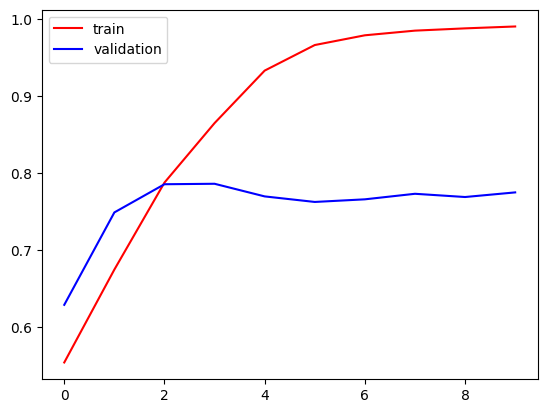

In [11]:
# Before Batch Normalization &  Dropout
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], color = 'red', label = 'train')
plt.plot(history.history['val_accuracy'], color = 'blue', label = 'validation')
plt.legend()
plt.show()

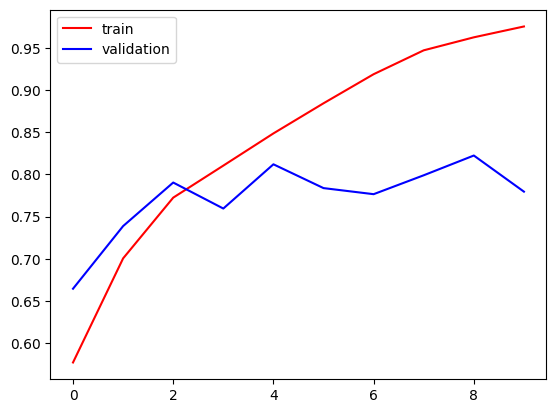

In [19]:
# After Batch Nornalization and Dropout
plt.plot(history.history['accuracy'], color = 'red', label = 'train')
plt.plot(history.history['val_accuracy'], color = 'blue', label = 'validation')
plt.legend()
plt.show()

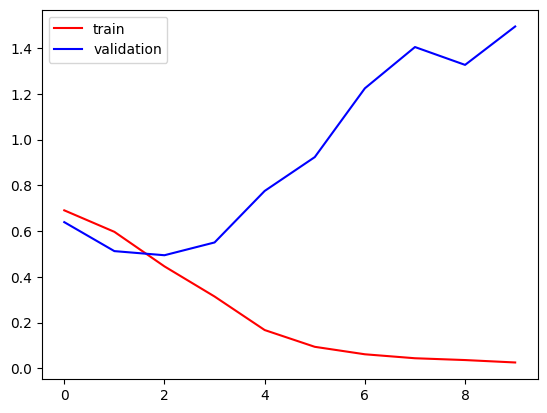

In [13]:
# Before
plt.plot(history.history['loss'], color = 'red', label = 'train')
plt.plot(history.history['val_loss'], color = 'blue', label = 'validation')
plt.legend()
plt.show()

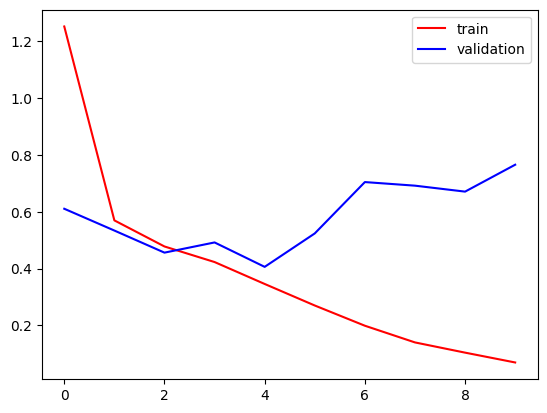

In [20]:
# After
plt.plot(history.history['loss'], color = 'red', label = 'train')
plt.plot(history.history['val_loss'], color = 'blue', label = 'validation')
plt.legend()
plt.show()

In [ ]:
# ways to reduce overfitting

# Add more data
# Data Augmentation
# L1/L2 Regulerizer
# Dropout
# Batch Normalization
# Reduce Complexity
# Early Stopping

In [ ]:
# Dropout & Batch Normalization

In [21]:
import cv2

In [31]:
test_img = cv2.imread('/content/cat.jpg')

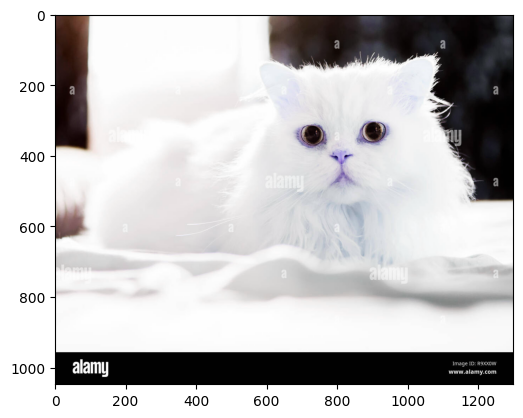

In [32]:
plt.imshow(test_img)

In [33]:
test_img.shape

(1048, 1300, 3)

In [34]:
test_img = cv2.resize(test_img, (256, 256))

In [35]:
test_input = test_img.reshape((1, 256, 256, 3))

In [36]:
model.predict(test_input)

1/1 [==============================] - 0s 21ms/step


array([[0.]], dtype=float32)